# Pandas 6133 Тюгаев Никита Павлович

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact
import ipywidgets as widgets

#### 1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [2]:
features_df = pd.read_csv(r"..\..\datasets\walmart_sales_forecast_data\features.csv")
features_df["Date"] = pd.to_datetime(features_df["Date"])

stores_df = pd.read_csv(r"..\..\datasets\walmart_sales_forecast_data\stores.csv")
train_df = pd.read_csv(r"..\..\datasets\walmart_sales_forecast_data\train.csv")

#### 2. Привести описание датасета.

##### features.csv

| Column       | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| Store        | Store number                                                                |
| Date         | Week                                                                         |
| Temperature  | Average temperature in the region                                            |
| Fuel_Price   | Cost of fuel in the region                                                   |
| MarkDown1    | Anonymized data related to promotional markdowns that Walmart is running.    |
| MarkDown2    | Anonymized data related to promotional markdowns that Walmart is running.    |
| MarkDown3    | Anonymized data related to promotional markdowns that Walmart is running.    |
| MarkDown4    | Anonymized data related to promotional markdowns that Walmart is running.    |
| MarkDown5    | Anonymized data related to promotional markdowns that Walmart is running.    |
| CPI          | The consumer price index                                                     |
| Unemployment | The unemployment rate                                                        |
| IsHoliday    | Whether the week is a special holiday week                                   |

##### stores.csv

| Column | Description                                      |
|--------|--------------------------------------------------|
| Store  | Stores numbered from 1 to 45                     |
| Type   | Store type has been provided, there are 3 types — A, B and C. |
| Size   | Stores size has provided                         |

##### test.csv

| Column    | Description                              |
|-----------|------------------------------------------|
| Store     | The store number                          |
| Dept      | The department number                     |
| Date      | The week                                  |
| IsHoliday | Whether the week is a special holiday week|

##### train.csv

| Column       | Description                                               |
|--------------|-----------------------------------------------------------|
| Store        | The store number                                          |
| Dept         | The department number                                     |
| Date         | The week                                                  |
| Weekly_Sales | Sales for the given department in the given store         |
| IsHoliday    | Whether the week is a special holiday week                |

#### 3. `matplotlib`:  
   - Построить несколько графиков разного вида с использованием `matplotlib`.  
   - Построить несколько суб-графиков на одном графике используя `.subplot`.  
   - Построить интерактивный график со слайдером.
   
   > - Графики должны быть разных видов.  
   > - Хотя бы в одном графике необходимо подписать оси.  
   > - Во всех графиках необходимо указать название.
   > - Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.

##### Построить несколько графиков разного вида с использованием `matplotlib`. 

###### 1. Линейный график: изменение средней температуры во времени для магазина №1

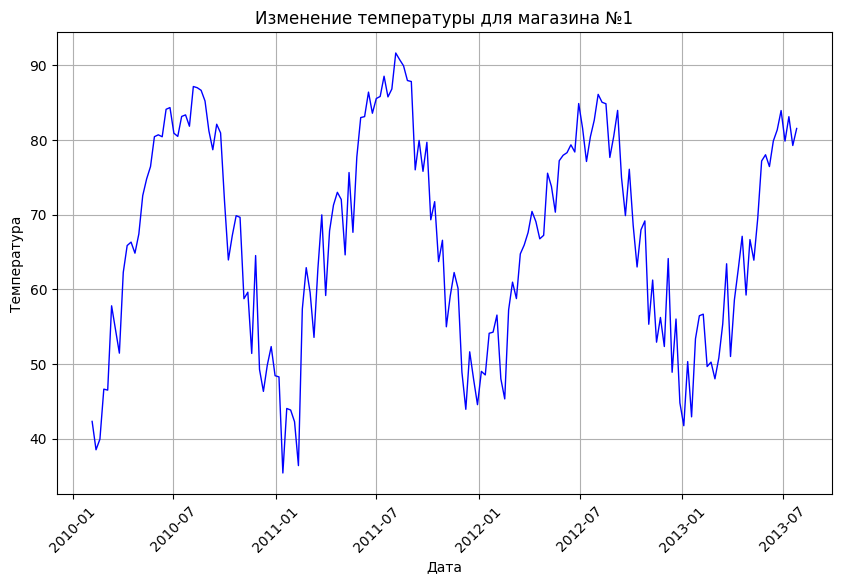

In [3]:
plt.figure(figsize=(10, 6))
store1_data = features_df[features_df["Store"] == 1].sort_values("Date")
plt.plot(
    pd.to_datetime(store1_data["Date"]),
    store1_data["Temperature"],
    color="blue",
    linewidth=1,
)
plt.title("Изменение температуры для магазина №1")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

###### 2. Scatter plot: зависимость цены топлива от температуры

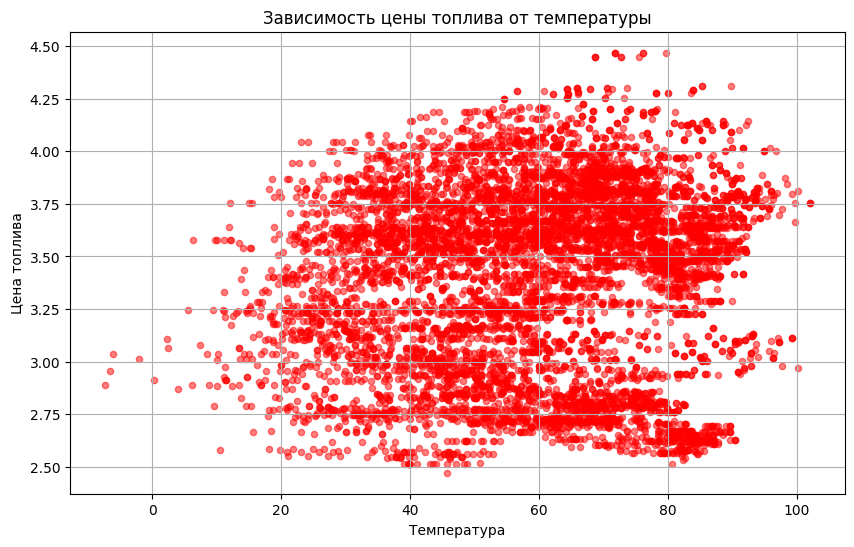

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(
    features_df["Temperature"], features_df["Fuel_Price"], alpha=0.5, c="red", s=20
)
plt.title("Зависимость цены топлива от температуры")
plt.xlabel("Температура")
plt.ylabel("Цена топлива")
plt.grid(True)
plt.show()

###### 3. Гистограмма: распределение значений CPI

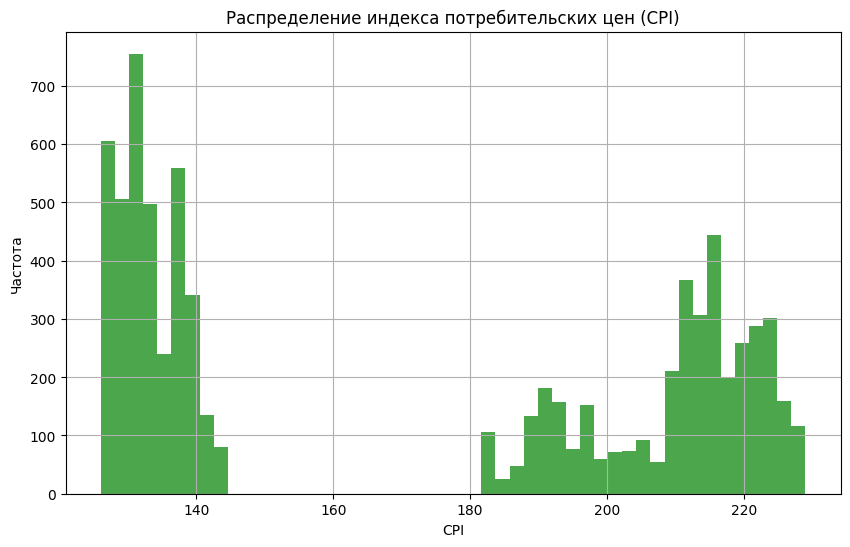

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(features_df["CPI"].dropna(), bins=50, color="green", alpha=0.7)
plt.title("Распределение индекса потребительских цен (CPI)")
plt.xlabel("CPI")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

##### Построить несколько суб-графиков на одном графике используя `.subplot`. 

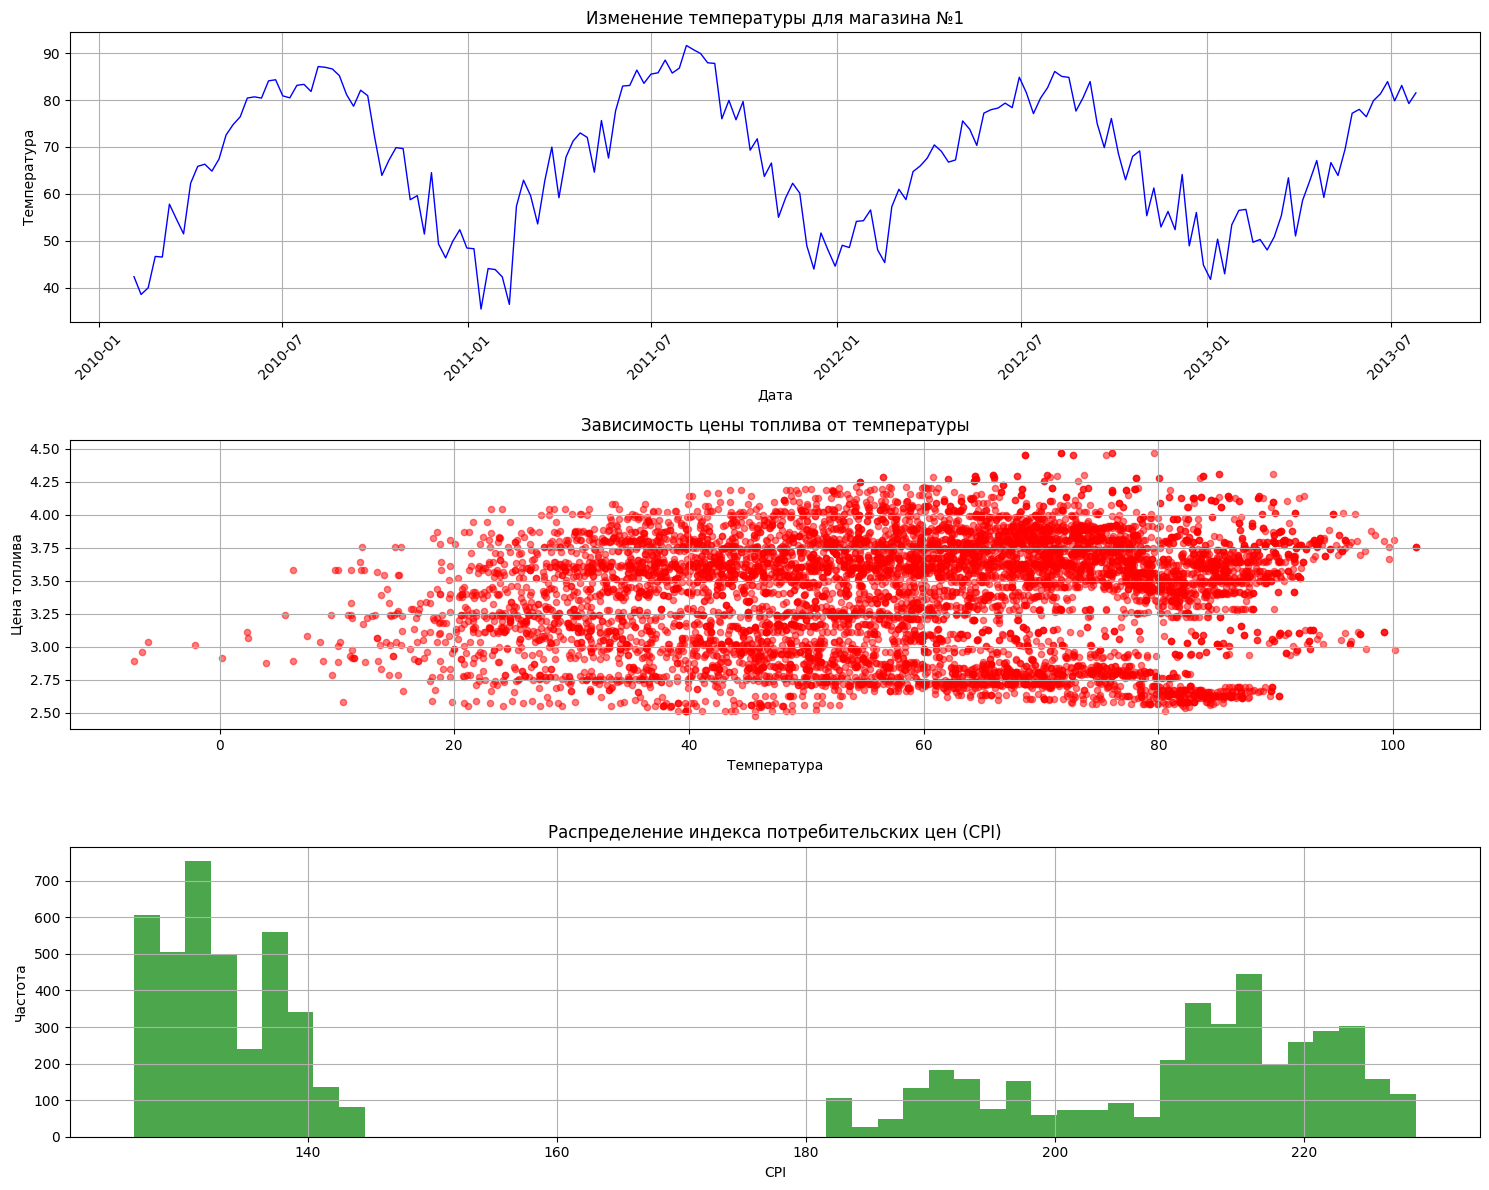

In [6]:
# Создаем фигуру с тремя графиками разного вида
fig = plt.figure(figsize=(15, 12))

# 1. Линейный график: изменение средней температуры во времени для магазина №1
plt.subplot(3, 1, 1)
store1_data = features_df[features_df["Store"] == 1].sort_values("Date")
plt.plot(
    pd.to_datetime(store1_data["Date"]),
    store1_data["Temperature"],
    color="blue",
    linewidth=1,
)
plt.title("Изменение температуры для магазина №1")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.grid(True)
plt.xticks(rotation=45)

# 2. Scatter plot: зависимость цены топлива от температуры
plt.subplot(3, 1, 2)
plt.scatter(
    features_df["Temperature"], features_df["Fuel_Price"], alpha=0.5, c="red", s=20
)
plt.title("Зависимость цены топлива от температуры")
plt.xlabel("Температура")
plt.ylabel("Цена топлива")
plt.grid(True)

# 3. Гистограмма: распределение значений CPI
plt.subplot(3, 1, 3)
plt.hist(features_df["CPI"].dropna(), bins=50, color="green", alpha=0.7)
plt.title("Распределение индекса потребительских цен (CPI)")
plt.xlabel("CPI")
plt.ylabel("Частота")
plt.grid(True)

# Настройка расположения графиков
plt.tight_layout()
plt.show()

##### Построить интерактивный график со слайдером.

In [7]:
# Функция для построения графика
def plot_store_temperature(store_number):
    # Фильтруем данные для выбранного магазина
    store_data = features_df[features_df["Store"] == store_number].sort_values("Date")

    # Создаем график
    plt.figure(figsize=(12, 6))
    plt.plot(store_data["Date"], store_data["Temperature"], color="blue", linewidth=1)

    # Добавляем оформление
    plt.title(f"Изменение температуры для магазина №{store_number}")
    plt.xlabel("Дата")
    plt.ylabel("Температура (°F)")
    plt.grid(True)
    plt.xticks(rotation=45)

    # Добавляем среднюю температуру
    mean_temp = store_data["Temperature"].mean()
    plt.axhline(
        y=mean_temp,
        color="r",
        linestyle="--",
        label=f"Средняя температура: {mean_temp:.1f}°F",
    )
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
# Создаем слайдер и привязываем его к функции построения графика
interact(
    plot_store_temperature,
    store_number=widgets.IntSlider(
        value=1, min=1, max=45, step=1, description="Магазин:", continuous_update=False
    ),
)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Магазин:', max=45, min=1), Outp…

<function __main__.plot_store_temperature(store_number)>

#### 4. `pandas`:  
   - Построить три разных вида графиков с использованием `pandas.DataFrame.plot` / `Series.plot`.  
   
   > - Среди графиков должен присутствовать один `boxplot` (обязательно надо использовать параметр `by`, для исследования взаимосвязи числовой переменной и какой-либо другой).  
   > - Графики должны быть построены как через методы `DataFrame`, так и через методы `Series`. То есть оба варианта нужно продемонстрировать. 

###### 1. График через DataFrame.plot - scatter plot

<Figure size 1000x600 with 0 Axes>

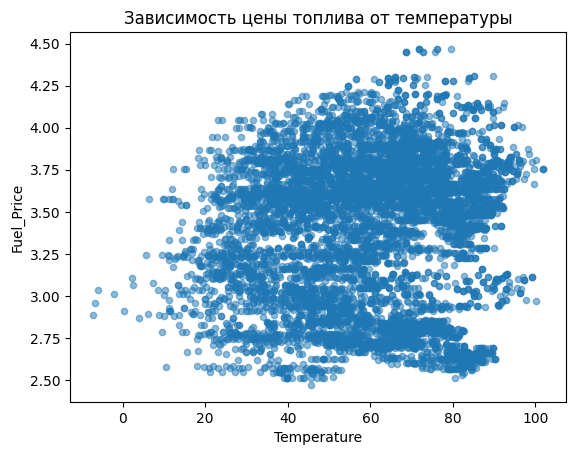

In [9]:
plt.figure(figsize=(10, 6))
features_df.plot(
    kind="scatter",
    x="Temperature",
    y="Fuel_Price",
    alpha=0.5,
    title="Зависимость цены топлива от температуры",
)
plt.show()

###### 2. График через Series.plot - гистограмма

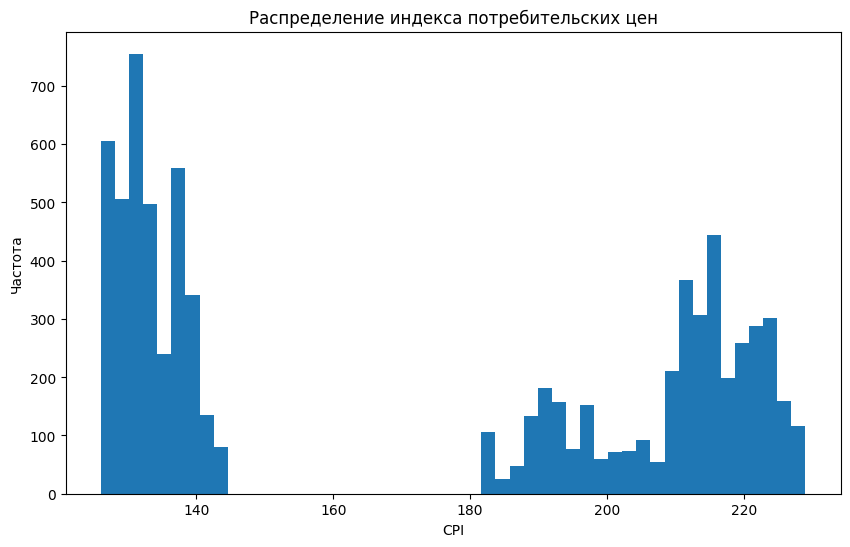

In [10]:
plt.figure(figsize=(10, 6))
features_df["CPI"].plot(
    kind="hist", bins=50, title="Распределение индекса потребительских цен"
)
plt.xlabel("CPI")
plt.ylabel("Частота")
plt.show()

###### 3. Boxplot с использованием параметра by

<Figure size 1000x600 with 0 Axes>

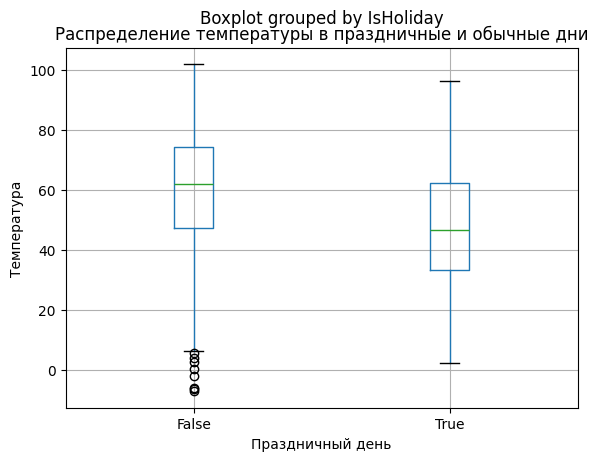

In [11]:
plt.figure(figsize=(10, 6))
features_df.boxplot(column="Temperature", by="IsHoliday")
plt.title("Распределение температуры в праздничные и обычные дни")
plt.xlabel("Праздничный день")
plt.ylabel("Температура")
plt.show()

#### 5. `seaborn`:  
   - Построить `.pairplot` на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.  
   - Построить `.jointplot`, проанализировать взаимосвязь двух конкретных числовых признаков.  
   - Построить `.boxplot` и/или `.violinplot` на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.  
   - Построить график `.heatmap` попарной корреляции всех числовых признаков.  
   
     > Категориальные признаки необходимо убрать из датафрейма перед построением. 

##### Построить `.pairplot` на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков. 

<Figure size 1200x1200 with 0 Axes>

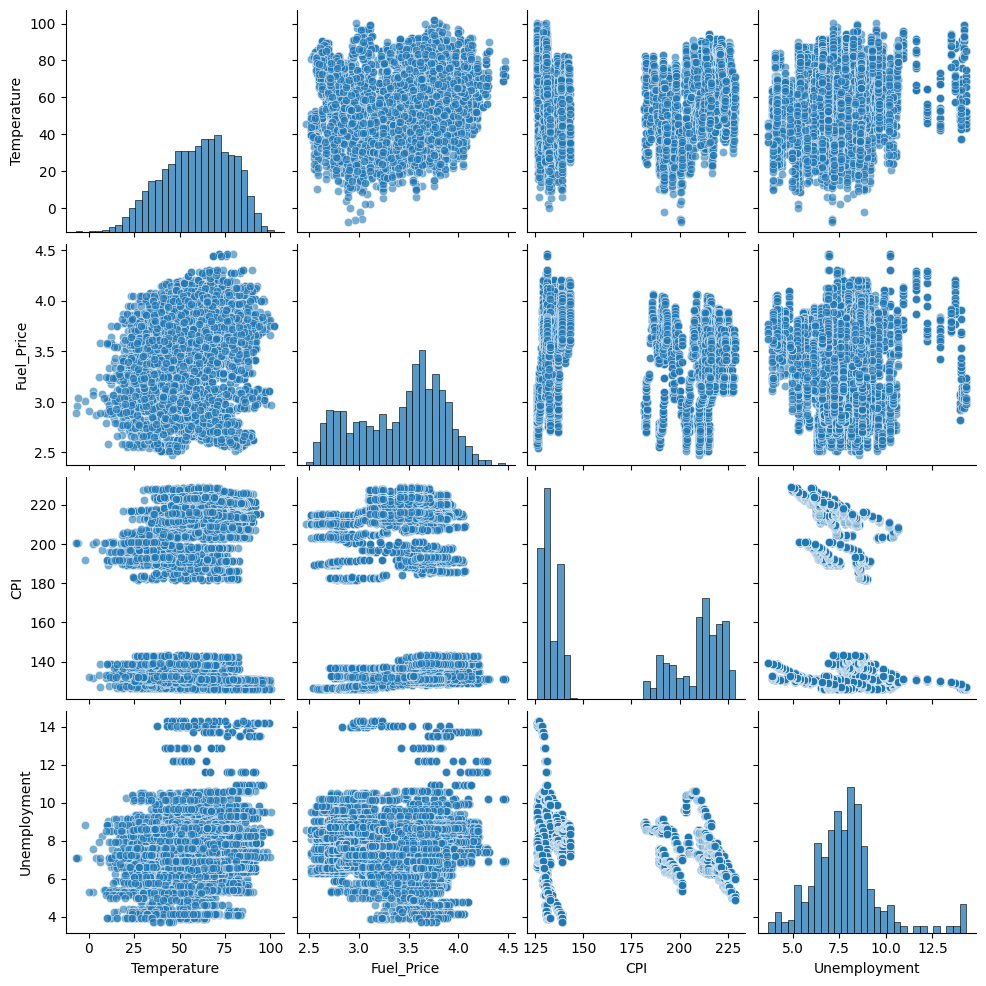

In [12]:
numeric_columns = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
numeric_df = features_df[numeric_columns]

# Создаем pairplot
plt.figure(figsize=(12, 12))
sns.pairplot(
    numeric_df,
    diag_kind="hist",  # гистограммы на диагонали
    plot_kws={"alpha": 0.6},  # прозрачность точек
    diag_kws={"bins": 30},  # количество столбцов в гистограммах
)
plt.show()

##### Построить `.jointplot`, проанализировать взаимосвязь двух конкретных числовых признаков. 

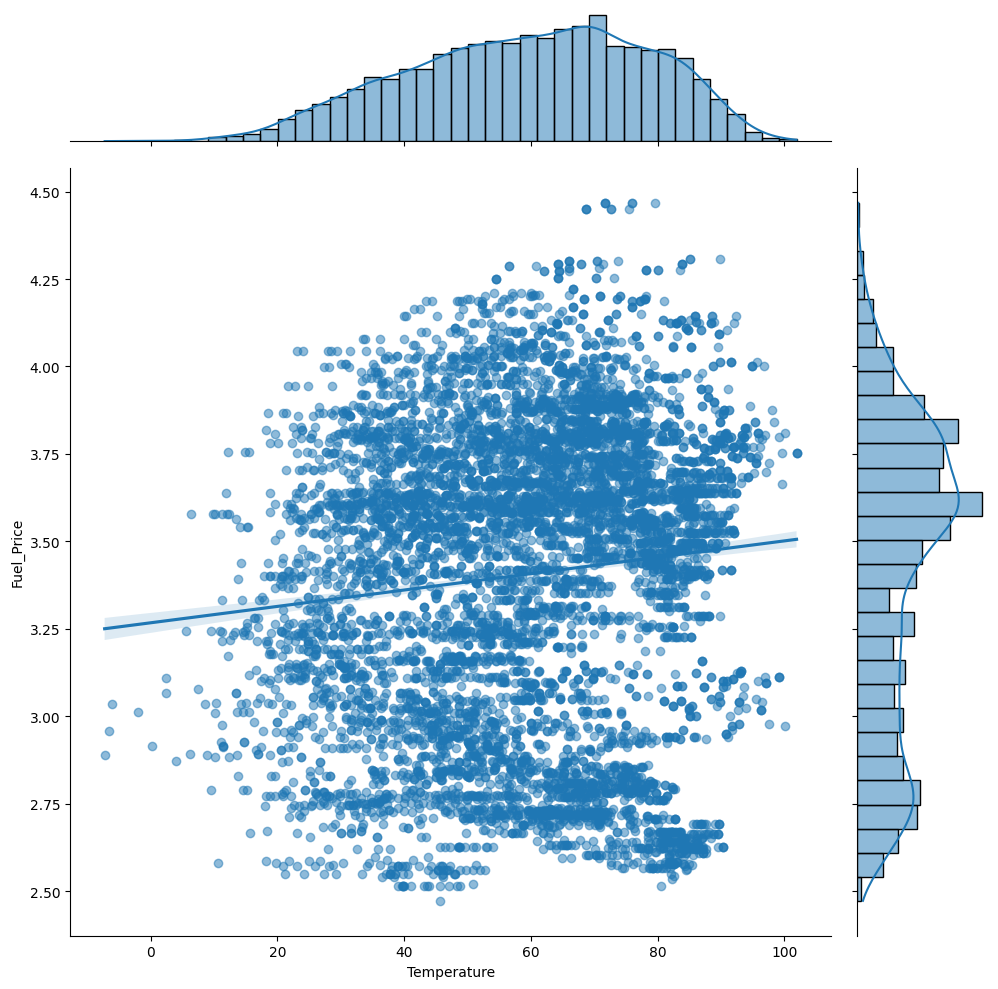

In [13]:
# Создаем jointplot
sns.jointplot(
    data=features_df,
    x="Temperature",
    y="Fuel_Price",
    kind="reg",  # добавляем линию регрессии
    scatter_kws={"alpha": 0.5},  # прозрачность точек
    height=10,  # размер графика
)
plt.show()

##### Построить `.boxplot` и/или `.violinplot` на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального. 

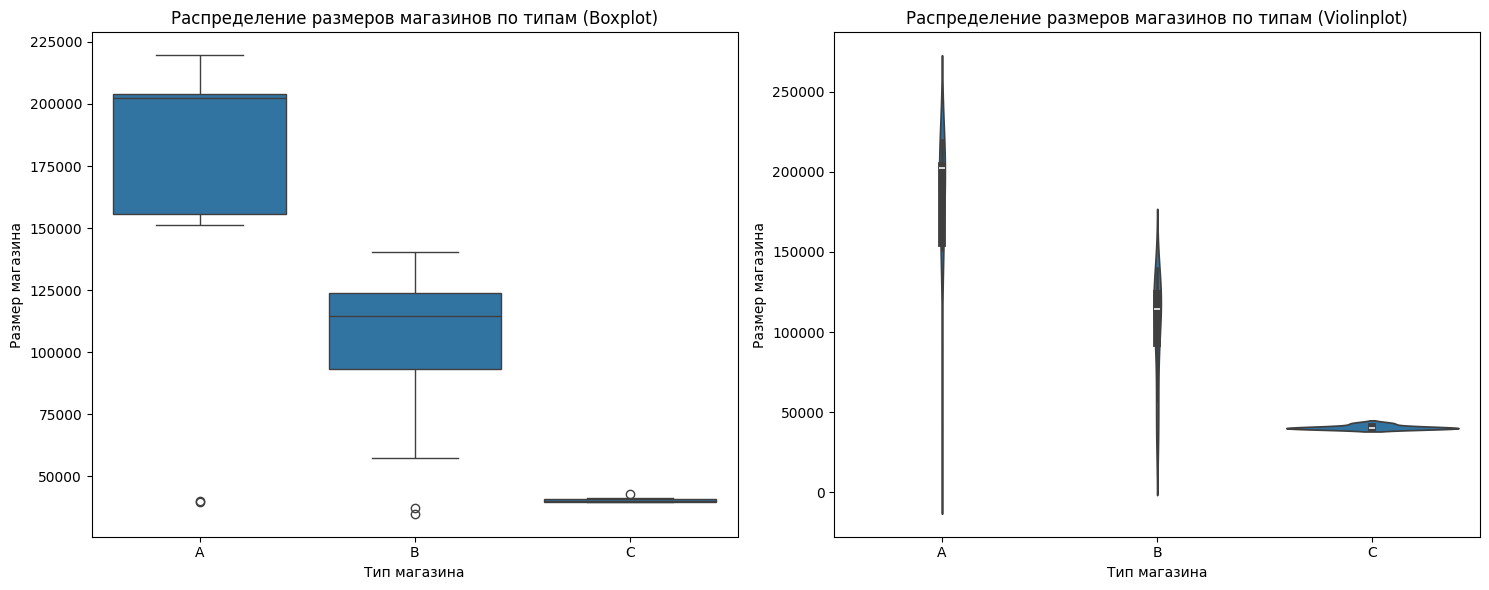

In [14]:
# Создаем подграфики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot
sns.boxplot(data=stores_df, x="Type", y="Size", ax=ax1)
ax1.set_title("Распределение размеров магазинов по типам (Boxplot)")
ax1.set_xlabel("Тип магазина")
ax1.set_ylabel("Размер магазина")

# Violinplot
sns.violinplot(data=stores_df, x="Type", y="Size", ax=ax2)
ax2.set_title("Распределение размеров магазинов по типам (Violinplot)")
ax2.set_xlabel("Тип магазина")
ax2.set_ylabel("Размер магазина")

plt.tight_layout()
plt.show()

##### Построить график `.heatmap` попарной корреляции всех числовых признаков. 

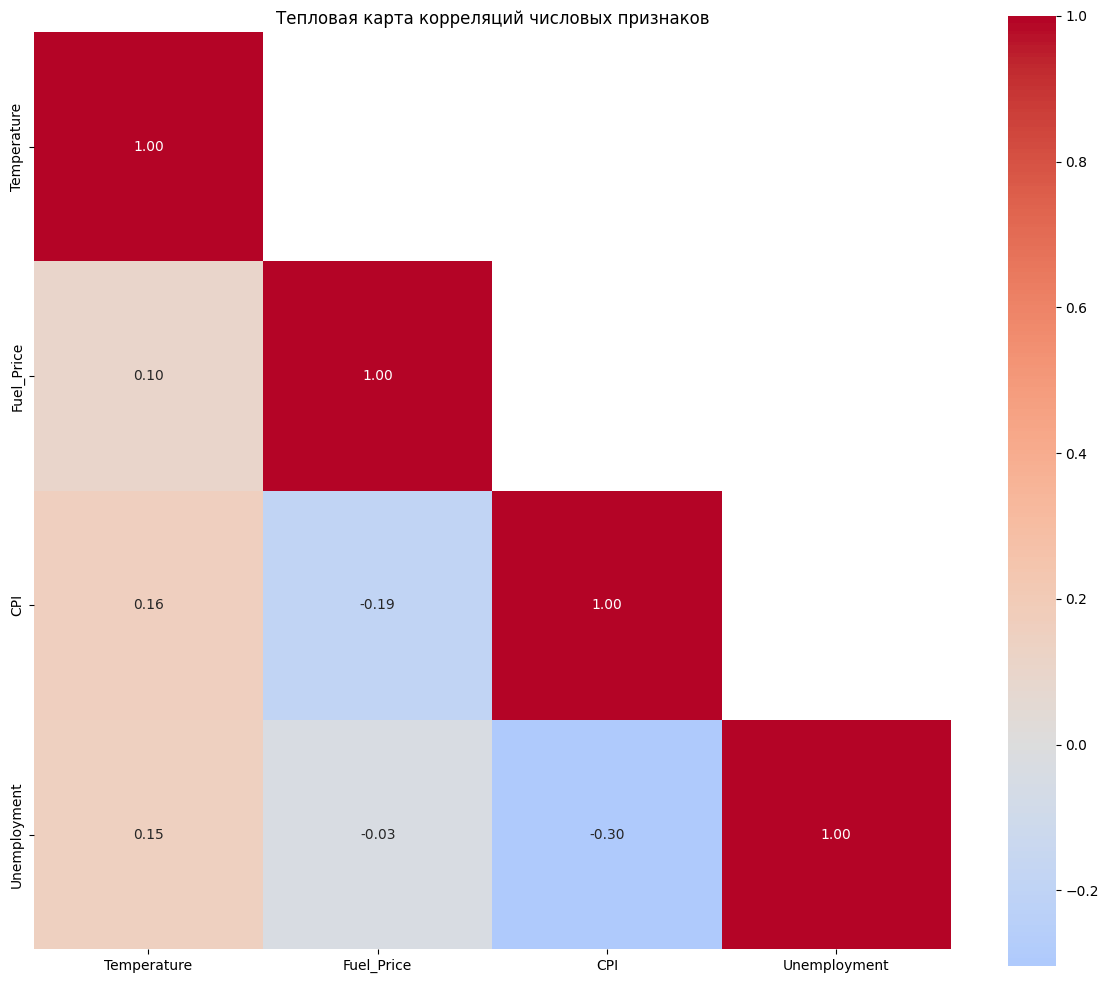

In [15]:
correlation_matrix = features_df[numeric_columns].corr()

# Создаем тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,  # показывать значения корреляций
    cmap="coolwarm",  # цветовая схема
    center=0,  # центр цветовой шкалы
    fmt=".2f",  # формат чисел
    square=True,  # квадратные ячейки
    mask=np.triu(correlation_matrix, k=1),  # маска для верхнего треугольника
)
plt.title("Тепловая карта корреляций числовых признаков")
plt.tight_layout()
plt.show()

#### 6. `scipy.stats`:  
   - Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.  

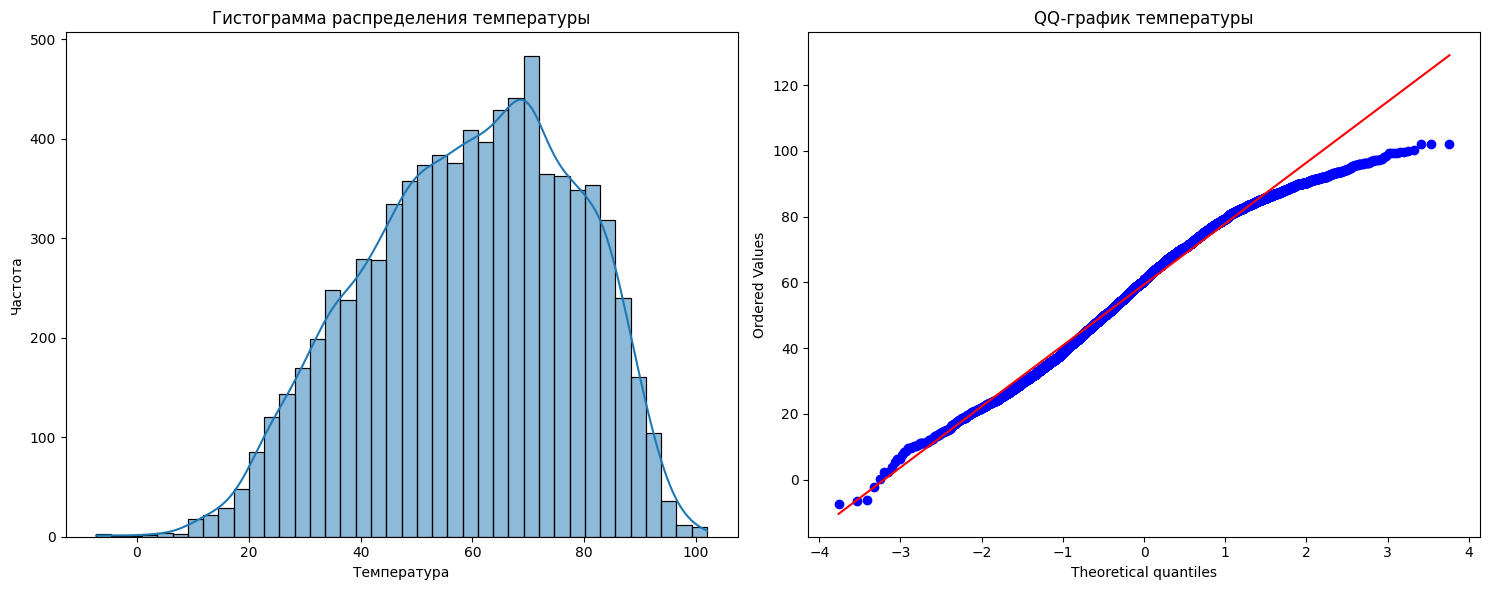

In [16]:
temperature = features_df["Temperature"]

# Создаем подграфики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма
sns.histplot(data=temperature, kde=True, ax=ax1)
ax1.set_title("Гистограмма распределения температуры")
ax1.set_xlabel("Температура")
ax1.set_ylabel("Частота")

# QQ-график
stats.probplot(temperature, dist="norm", plot=ax2)
ax2.set_title("QQ-график температуры")

plt.tight_layout()
plt.show()

In [17]:
# Тест Шапиро-Уилка на нормальность
statistic, p_value = stats.shapiro(temperature)
print(f"Тест Шапиро-Уилка:")
print(f"Статистика: {statistic:.4f}")
print(f"P-значение: {p_value:.4e}")

Тест Шапиро-Уилка:
Статистика: 0.9840
P-значение: 2.0809e-29


c:\Users\os\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8190.
  res = hypotest_fun_out(*samples, **kwds)


#### 7. `plotly`:  
   - Построить несколько графиков разного вида.  
   - Построить несколько суб-графиков на одном графике.  
   - Построить интерактивный график.  
   
     > Использование `Dash` опционально.

##### Построить несколько графиков разного вида.

###### 1. Scatter plot с анимацией по времени

In [18]:
fig1 = px.scatter(
    features_df,
    x="Temperature",
    y="Fuel_Price",
    color="IsHoliday",
    animation_frame=features_df["Date"].dt.year,
    title="Зависимость цены топлива от температуры по годам",
    labels={
        "Temperature": "Температура",
        "Fuel_Price": "Цена топлива",
        "IsHoliday": "Праздничный день",
    },
)

fig1.show()

###### 2. Круговая диаграмма распределения типов магазинов

In [19]:
store_types = stores_df["Type"].value_counts()
fig2 = go.Figure(
    data=[go.Pie(labels=store_types.index, values=store_types.values, hole=0.3)]
)
fig2.update_layout(title="Распределение типов магазинов")

fig2.show()

###### 3. Box plot распределения CPI по типам магазинов

In [20]:
merged_df = pd.merge(features_df, stores_df, on="Store")
fig3 = px.box(
    merged_df,
    x="Type",
    y="CPI",
    color="Type",
    title="Распределение индекса потребительских цен по типам магазинов",
)

fig3.show()

##### Построить несколько суб-графиков на одном графике. 

In [21]:
# Создаем фигуру с подграфиками
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        "Распределение температуры",
        "Распределение цен на топливо",
        "Распределение размеров магазинов",
        "Средняя температура по типам магазинов",
    ),
)

# 1. Гистограмма температуры
fig.add_trace(
    go.Histogram(x=features_df["Temperature"], name="Температура"), row=1, col=1
)

# 2. Box plot цен на топливо
fig.add_trace(go.Box(y=features_df["Fuel_Price"], name="Цена топлива"), row=1, col=2)

# 3. Гистограмма размеров магазинов
fig.add_trace(go.Histogram(x=stores_df["Size"], name="Размер"), row=2, col=1)

# 4. Bar plot средней температуры по типам магазинов
merged_df = pd.merge(features_df, stores_df, on="Store")
avg_temp = merged_df.groupby("Type")["Temperature"].mean()
fig.add_trace(
    go.Bar(x=avg_temp.index, y=avg_temp.values, name="Средняя температура"),
    row=2,
    col=2,
)

# Обновляем layout
fig.update_layout(
    height=800, title_text="Анализ характеристик магазинов Walmart", showlegend=False
)

# Показываем график
fig.show()

##### Построить интерактивный график. 

In [22]:
# Объединяем данные о продажах с информацией о магазинах
merged_df = pd.merge(train_df, stores_df, on="Store")

In [23]:
# Рассчитываем средние продажи по магазинам и отделам
avg_sales = (
    merged_df.groupby(["Store", "Dept", "Type"])["Weekly_Sales"].mean().reset_index()
)

In [24]:
# Нормализуем размер точек
avg_sales["Size_Normalized"] = (
    np.abs(avg_sales["Weekly_Sales"]) / np.abs(avg_sales["Weekly_Sales"]).max() * 30
) + 5

In [25]:
# Создаем фигуру
fig = go.Figure()

# Добавляем точки для каждого типа магазина
for store_type in ["A", "B", "C"]:
    mask = avg_sales["Type"] == store_type
    fig.add_trace(
        go.Scatter(
            x=avg_sales[mask]["Store"],
            y=avg_sales[mask]["Weekly_Sales"],
            mode="markers",
            name=f"Тип {store_type}",
            marker=dict(size=avg_sales[mask]["Size_Normalized"], line=dict(width=1)),
            hovertemplate=(
                "Магазин: %{x}<br>"
                + "Продажи: $%{y:.2f}<br>"
                + "Отдел: %{customdata}<br>"
                + "Тип: "
                + store_type
                + "<extra></extra>"
            ),
            customdata=avg_sales[mask]["Dept"],
        )
    )

# Настраиваем layout
fig.update_layout(
    title="Средние недельные продажи по магазинам",
    xaxis_title="Номер магазина",
    yaxis_title="Средние недельные продажи ($)",
    height=700,
    showlegend=True,
    hovermode="closest",
    updatemenus=[
        {
            "buttons": [
                {
                    "label": "Все типы",
                    "method": "update",
                    "args": [{"visible": [True, True, True]}],
                },
                {
                    "label": "Тип A",
                    "method": "update",
                    "args": [{"visible": [True, False, False]}],
                },
                {
                    "label": "Тип B",
                    "method": "update",
                    "args": [{"visible": [False, True, False]}],
                },
                {
                    "label": "Тип C",
                    "method": "update",
                    "args": [{"visible": [False, False, True]}],
                },
            ],
            "direction": "down",
            "showactive": True,
            "x": 1,
            "y": 0.85,
            "xanchor": "left",
            "yanchor": "top",
        }
    ],
)

fig.show()